In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Проект: анализ зарплат в России

### В проекте использованы открытые данные из официальных источников:
#### - [_Среднемесячная номинальная начисленная заработная плата за 2000-2023 гг;_](https://rosstat.gov.ru/labor_market_employment_salaries)

#### - [_Уровень инфляции._](https://уровень-инфляции.рф/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

### [_Методика расчёта реальной заработной платы_](https://fedstat.ru/indicator/43245#)
    
### Задание: проанализировать динамику уровня средних зарплат в разрезе по видам экономической деятельности (ВЭД) в России.  

## 1. Анализ номинальных заработных плат

In [2]:
df_salary = pd.read_csv('data/salary_excerpt.csv')

In [3]:
df_salary.head(10)

,ВЭД,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Строительство,2640,3859,4807,6177,7305,9043,10869,14333,18574,...,29354,29960,32332,33678,38518,42630,44738,51944,60850,68944
1,Гостиницы и рестораны,1640,2404,3039,3967,4737,6033,7522,9339,11536,...,19759,20626,22041,23971,26241,28191,27411,33225,37572,43192
2,Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54263


In [4]:
years = df_salary.columns[1:].map(int)
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

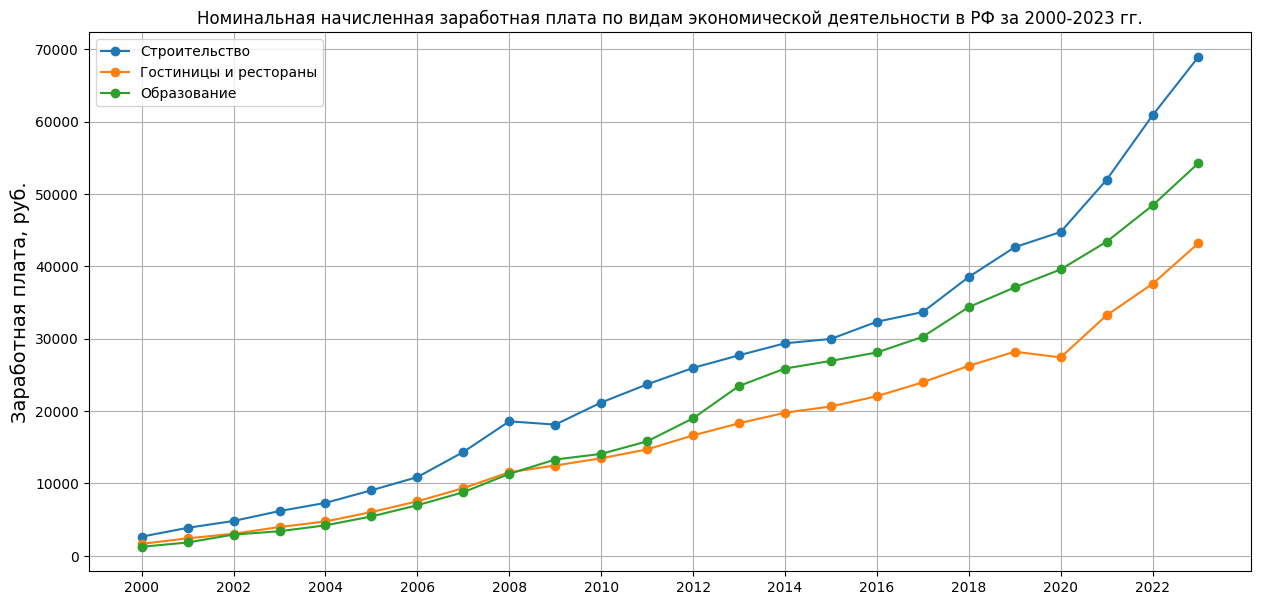

In [5]:
plt.figure(figsize=(15, 7))
for i in range(df_salary.shape[0]):
  plt.plot(years, df_salary.iloc[i].values[1:], 'o-', label=df_salary.iloc[i].values[0])
plt.title(f'Номинальная начисленная заработная плата по видам экономической деятельности в РФ за {years[0]}-{years[-1]} гг.')
plt.xticks(years[::2])
plt.ylabel('Заработная плата, руб.', fontsize=14)
plt.grid()
plt.legend()
plt.show();

### Вывод по разделу "Анализ номинальных заработных плат"

В период с 2000 по 2023 гг. наблюдается устойчивый тренд на увеличение номинальных начисленных заработных плат в рассматриваемых ВЭД (Строительство, Гостиницы и рестораны, Образование).

Отдельно по ВЭД:

* `Строительство`

Кривая изменения номинальной заработной платы может быть разделена на 4 визуально отличающихся этапа:
  - 2000-2008 гг.: устойчивый рост;
  - 2008-2009 гг.: падение номинальной заработной платы (период острой фазы мирового экономического кризиса, связанного с ипотечным "пузырём" в США);
  - 2009-2020 гг.: умеренный устойчивый рост;
  - 2020-2023 гг.: быстрый рост номинальной заработной платы. Отложенный спрос
  в период пандемии COVID-19 и "льготная" ипотека обусловили значительный рост цен на недвижимость и, возможно, как следствие, привели к увеличению заработных плат.

* `Гостиницы и рестораны`

Характерен умеренный устойчивый рост за период с 2000 по 2023 г., кроме 2020 г., в котором наблюдается снижение номинальной заработной платы из-за пандемии COVID-19: запрет на работу с посетителями в гостиницах и ресторанах. Как следствие, снижение доходов (и уход с рынка) некоторых представителей этого ВЭД.


* `Образование`

- 2000-2008 гг. умеренный рост номинальных заработных плат, который остаются ниже средних по экономике;
- 2008-2023 гг. устойчивый тренд на повышение номинальных заработных плат (особенно выражен с 2013 г.) и связан с реализацией поручения Президента РФ о доведении заработных плат работников системы образования до средних по экономике.

### 2. Инфляция

In [6]:
df_inflation = pd.read_csv('data/inflation_by_month.csv')

In [7]:
df_inflation.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,0.86,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
1,2023,0.84,0.46,0.37,0.38,0.31,0.37,0.63,0.28,0.87,0.83,1.11,0.73,7.42
2,2022,0.99,1.17,7.61,1.56,0.12,-0.35,-0.39,-0.52,0.05,0.18,0.37,0.78,11.92
3,2021,0.67,0.78,0.66,0.58,0.74,0.69,0.31,0.17,0.60,1.11,0.96,0.82,8.39
4,2020,0.40,0.33,0.55,0.83,0.27,0.22,0.35,-0.04,-0.07,0.43,0.71,0.83,4.91


In [8]:
df_inflation[['Год', 'Всего']][(df_inflation['Год'] > 1999) & (df_inflation['Год'] < 2024)].sort_values('Год').reset_index(drop=True)

,Год,Всего
0,2000,20.20
1,2001,18.58
2,2002,15.06
3,2003,11.99
4,2004,11.74
5,2005,10.91
6,2006,9.00
7,2007,11.87
8,2008,13.28
9,2009,8.80


In [9]:
inflation = df_inflation['Всего'][(df_inflation['Год'] > 1999) & (df_inflation['Год'] < 2024)].values[::-1]
inflation

array([20.2 , 18.58, 15.06, 11.99, 11.74, 10.91,  9.  , 11.87, 13.28,
        8.8 ,  8.78,  6.1 ,  6.58,  6.45, 11.36, 12.91,  5.38,  2.52,
        4.27,  3.05,  4.91,  8.39, 11.92,  7.42])

In [10]:
df_salary.loc[len(df_salary.index)] = ['Инфляция', *inflation]
df_salary

,ВЭД,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Строительство,2640.0,3859.00,4807.00,6177.00,7305.00,9043.00,10869.0,14333.00,18574.00,...,29354.00,29960.00,32332.00,33678.00,38518.00,42630.00,44738.00,51944.00,60850.00,68944.00
1,Гостиницы и рестораны,1640.0,2404.00,3039.00,3967.00,4737.00,6033.00,7522.0,9339.00,11536.00,...,19759.00,20626.00,22041.00,23971.00,26241.00,28191.00,27411.00,33225.00,37572.00,43192.00
2,Образование,1240.0,1833.00,2927.00,3387.00,4203.00,5430.00,6983.0,8778.00,11317.00,...,25862.00,26928.00,28088.00,30258.00,34361.00,37072.00,39563.00,43391.00,48400.00,54263.00
3,Инфляция,20.2,18.58,15.06,11.99,11.74,10.91,9.0,11.87,13.28,...,11.36,12.91,5.38,2.52,4.27,3.05,4.91,8.39,11.92,7.42


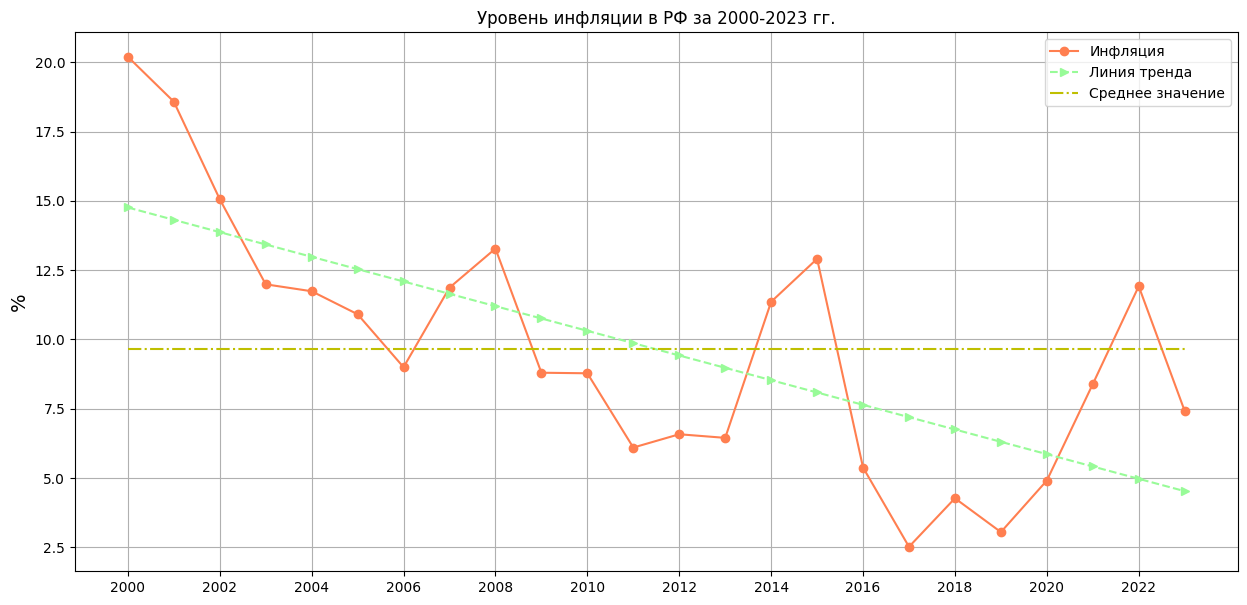

In [11]:
#calculate equation for trendline
z = np.polyfit(years, inflation, 1)
p = np.poly1d(z)

plt.figure(figsize=(15, 7))
plt.plot(years, df_salary.iloc[3].values[1:], 'o-', color='coral', label='Инфляция')
# добавление линии тренда
plt.plot(years, p(years), '>--', color='palegreen', label='Линия тренда')
# добавление среднего значения инфляции с 2000-2023 гг.
plt.plot(years, np.ones_like(years) * np.mean(df_salary.iloc[3].values[1:]), '-.', color='y', label='Среднее значение')

plt.title(f'Уровень инфляции в РФ за {years[0]}-{years[-1]} гг.')
plt.xticks(years[::2])
plt.ylabel('%', fontsize=14)
plt.grid()
plt.legend()
plt.show();

In [12]:
class RealSalary:

  def __init__(self, salary, inflation) -> None:
    if not isinstance(salary, np.ndarray):
      raise TypeError(f"Wrong Salary type: {type(salary)}. Only <np.ndarray> type is allowed.")
    if not isinstance(inflation, np.ndarray):
      raise TypeError(f"Wrong Inflation type: {type(inflation)}. Only <np.ndarray> type is allowed.")
    if not salary.size:
      raise Exception(f"Salary array cannot be empty.")
    if not inflation.size:
      raise Exception(f"Inflation array cannot be empty.")
    if not salary.size == inflation.size:
      raise Exception(f"Salary and Inflation array sizes must be equal.")
    self.salary = salary
    self.inflation = inflation

  def __str__(self) -> str:
    return 'Some info about class'

  def shape(self):
    return self.calc().shape

  def calc(self):
    return (self.salary[1:] / (self.inflation[:-1] / 100 + 1)).astype('int')


In [13]:
inflation = df_salary[df_salary['ВЭД'] == 'Инфляция'].squeeze().values[1:]
inflation

array([20.2, 18.58, 15.06, 11.99, 11.74, 10.91, 9.0, 11.87, 13.28, 8.8,
       8.78, 6.1, 6.58, 6.45, 11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 4.91,
       8.39, 11.92, 7.42], dtype=object)

In [14]:
industry, salary = df_salary.iloc[0].values[0], df_salary.iloc[0].values[1:]
industry, salary

('Строительство',
 array([2640.0, 3859.0, 4807.0, 6177.0, 7305.0, 9043.0, 10869.0, 14333.0,
        18574.0, 18122.0, 21172.0, 23682.0, 25951.0, 27701.0, 29354.0,
        29960.0, 32332.0, 33678.0, 38518.0, 42630.0, 44738.0, 51944.0,
        60850.0, 68944.0], dtype=object))

In [15]:
real_salary = RealSalary(salary, inflation)

In [16]:
def plot_salaries(x, real_salary, industry):

  fig, ax1 = plt.subplots(figsize=(15, 7))
  color = 'green'
  ax1.set_ylabel('Заработная плата, руб.', color=color, fontsize=14)
  ax1.plot(x, real_salary.salary, '-.', color=color, label='Номинальная заработная плата')
  ax1.plot(x[1:], real_salary.calc(), '--', label='Реальная заработная плата', color='y')
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'coral'
  ax2.set_ylabel('Инфляция, %', color=color, fontsize=14)  # we already handled the x-label with ax1
  ax2.plot(years, real_salary.inflation, label='Инфляция', color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.xticks(years[::2])
  ax1.legend(loc='best')
  ax2.legend(loc='best')

  plt.title(f'Вид экономической деятельности: {industry}')
  ax1.grid(which='major', axis='both', color='gainsboro', linestyle='-')
  plt.show();

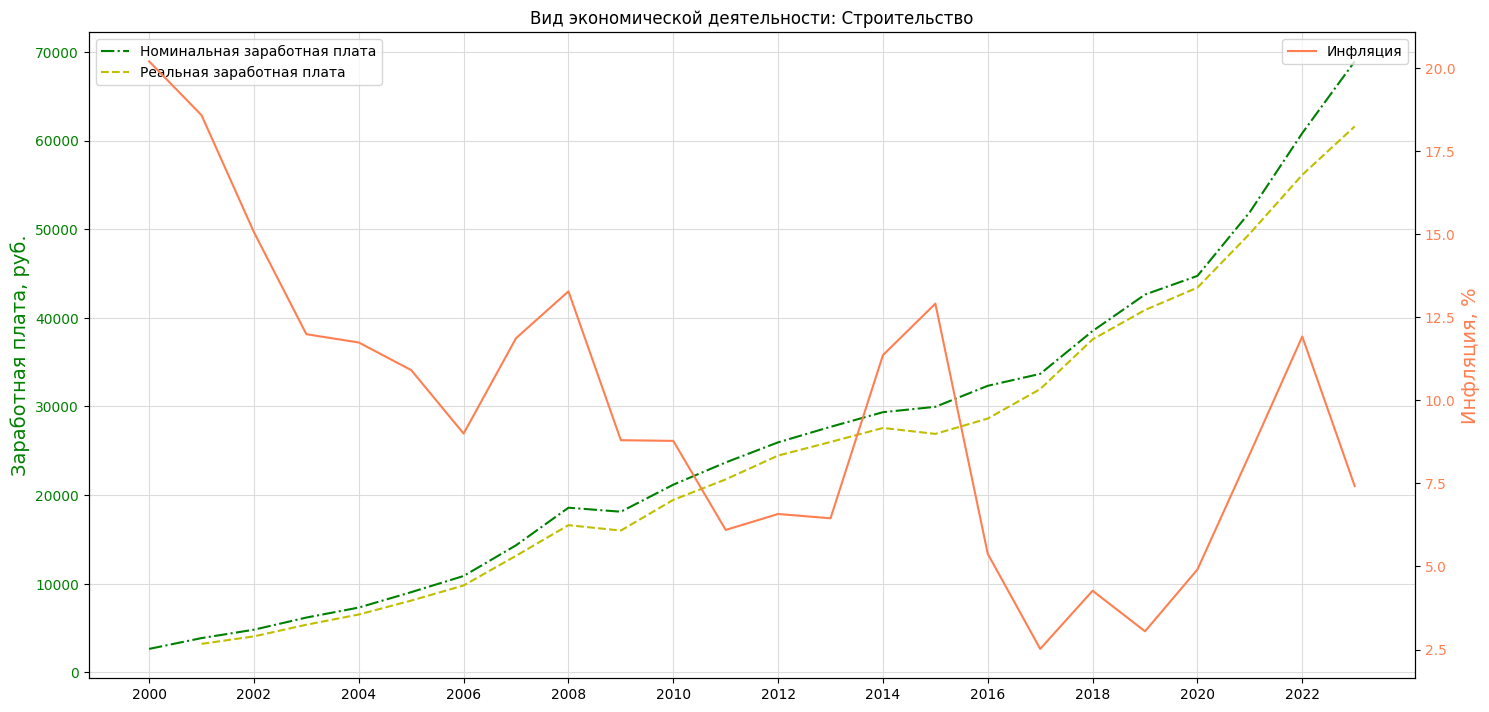

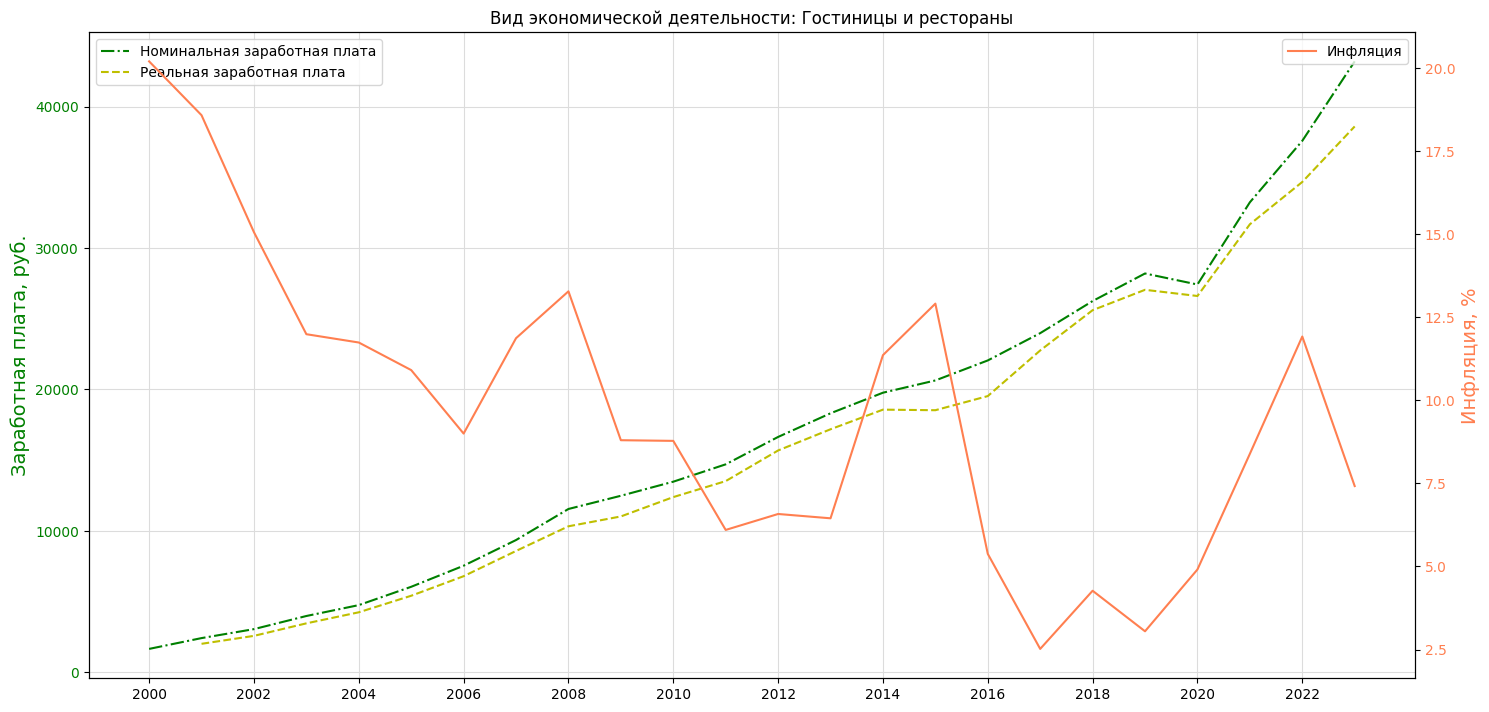

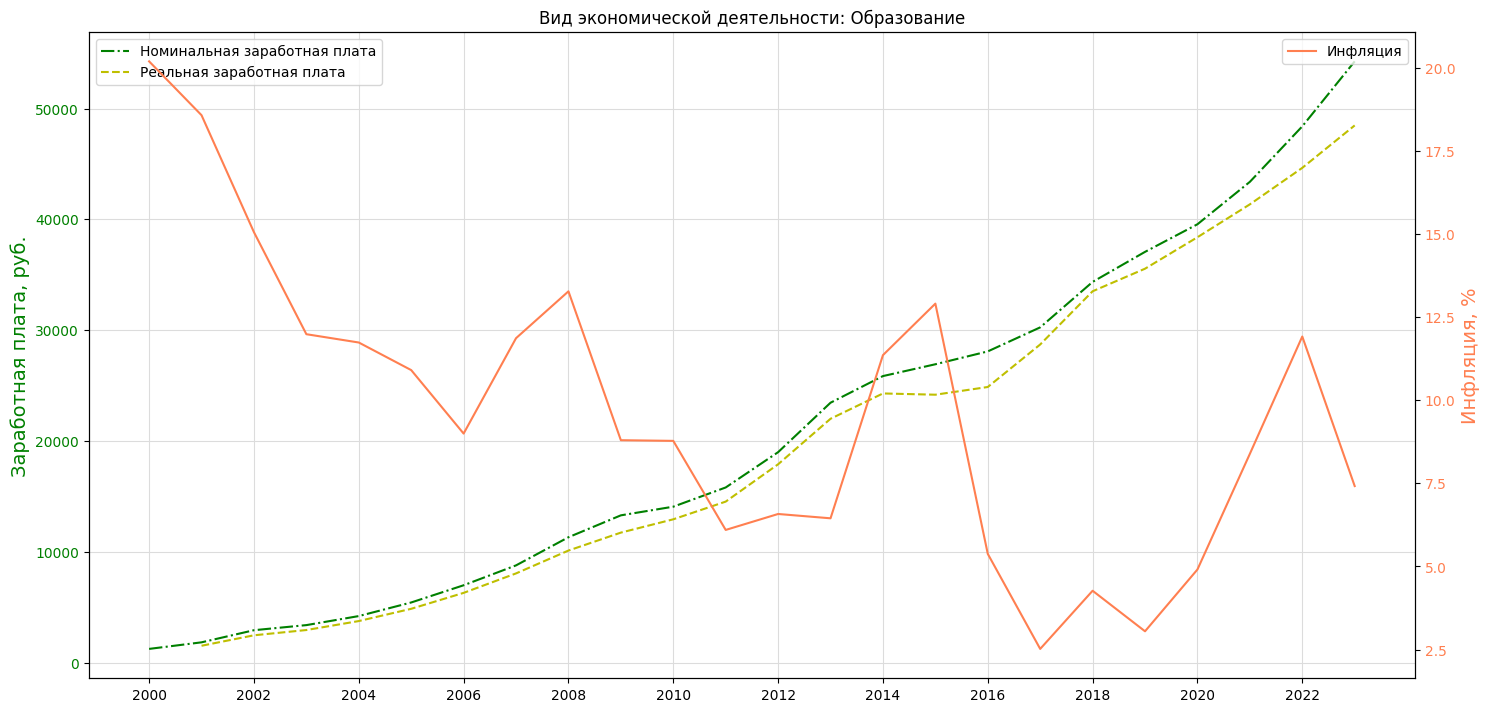

In [17]:
for i in range(df_salary.shape[0]-1):
  industry, salary = df_salary.iloc[i].values[0], df_salary.iloc[i].values[1:]
  real_salary = RealSalary(salary, inflation)
  plot_salaries(years, real_salary, industry)
  print()

## Индекс счастья

In [18]:
df = pd.read_csv('data/hpi.csv')

In [19]:
df.columns[1:]

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [20]:
hpi = df.loc[0].values

In [21]:
df_2 = df_salary[['ВЭД'] + df.columns[1:].values.tolist()]
df_2

,ВЭД,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Строительство,10869.0,14333.00,18574.00,18122.0,21172.00,23682.0,25951.00,27701.00,29354.00,29960.00,32332.00,33678.00,38518.00,42630.00,44738.00
1,Гостиницы и рестораны,7522.0,9339.00,11536.00,12470.0,13466.00,14693.0,16631.00,18304.00,19759.00,20626.00,22041.00,23971.00,26241.00,28191.00,27411.00
2,Образование,6983.0,8778.00,11317.00,13294.0,14075.00,15809.0,18995.00,23458.00,25862.00,26928.00,28088.00,30258.00,34361.00,37072.00,39563.00
3,Инфляция,9.0,11.87,13.28,8.8,8.78,6.1,6.58,6.45,11.36,12.91,5.38,2.52,4.27,3.05,4.91


In [22]:
df_salary['ВЭД']

0            Строительство
1    Гостиницы и рестораны
2              Образование
3                 Инфляция
Name: ВЭД, dtype: object

In [23]:
df.columns[1:].values

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [24]:
from copy import copy

In [25]:
df_corr = df_salary[['ВЭД'] + df.columns[1:].values.tolist()].copy(deep=True)
df_corr

,ВЭД,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Строительство,10869.0,14333.00,18574.00,18122.0,21172.00,23682.0,25951.00,27701.00,29354.00,29960.00,32332.00,33678.00,38518.00,42630.00,44738.00
1,Гостиницы и рестораны,7522.0,9339.00,11536.00,12470.0,13466.00,14693.0,16631.00,18304.00,19759.00,20626.00,22041.00,23971.00,26241.00,28191.00,27411.00
2,Образование,6983.0,8778.00,11317.00,13294.0,14075.00,15809.0,18995.00,23458.00,25862.00,26928.00,28088.00,30258.00,34361.00,37072.00,39563.00
3,Инфляция,9.0,11.87,13.28,8.8,8.78,6.1,6.58,6.45,11.36,12.91,5.38,2.52,4.27,3.05,4.91


In [26]:
df_corr.loc[df_corr.shape[0]] = df.loc[0]

In [27]:
df_corr.loc[len(df_corr.index)] = [*hpi]


In [28]:
df_corr.iloc[0].values[1:]

array([10869.0, 14333.0, 18574.0, 18122.0, 21172.0, 23682.0, 25951.0,
       27701.0, 29354.0, 29960.0, 32332.0, 33678.0, 38518.0, 42630.0,
       44738.0], dtype=object)

In [29]:
df_corr

,ВЭД,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Строительство,10869.0,14333.00,18574.00,18122.0,21172.00,23682.0,25951.00,27701.00,29354.00,29960.00,32332.00,33678.00,38518.00,42630.00,44738.00
1,Гостиницы и рестораны,7522.0,9339.00,11536.00,12470.0,13466.00,14693.0,16631.00,18304.00,19759.00,20626.00,22041.00,23971.00,26241.00,28191.00,27411.00
2,Образование,6983.0,8778.00,11317.00,13294.0,14075.00,15809.0,18995.00,23458.00,25862.00,26928.00,28088.00,30258.00,34361.00,37072.00,39563.00
3,Инфляция,9.0,11.87,13.28,8.8,8.78,6.1,6.58,6.45,11.36,12.91,5.38,2.52,4.27,3.05,4.91
4,NaN,30.5,31.40,33.10,32.6,33.40,32.3,34.30,34.10,37.00,38.10,37.50,35.40,35.10,34.90,35.10
5,hpi,30.5,31.40,33.10,32.6,33.40,32.3,34.30,34.10,37.00,38.10,37.50,35.40,35.10,34.90,35.10


In [30]:
df_corr.transpose().corr(numeric_only=True)

""


In [31]:
years = df_corr.columns[1:].astype('int')
years

Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020],
      dtype='int64')

In [32]:
y = df_corr.iloc[0].values[1:]
y

array([10869.0, 14333.0, 18574.0, 18122.0, 21172.0, 23682.0, 25951.0,
       27701.0, 29354.0, 29960.0, 32332.0, 33678.0, 38518.0, 42630.0,
       44738.0], dtype=object)

In [33]:
z = df_corr.iloc[-1].values[1:]
z

array([30.5, 31.4, 33.1, 32.6, 33.4, 32.3, 34.3, 34.1, 37.0, 38.1, 37.5,
       35.4, 35.1, 34.9, 35.1], dtype=object)

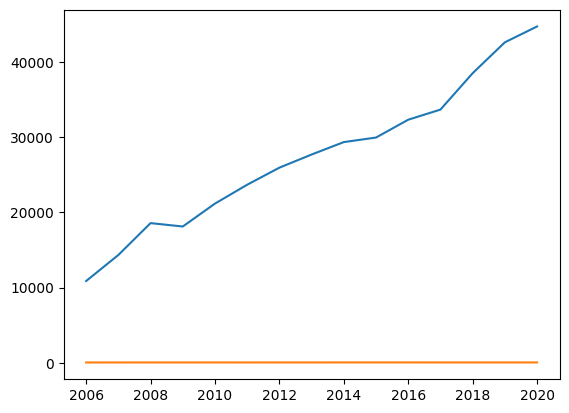

In [34]:
plt.plot(years, y)
plt.plot(years, z)

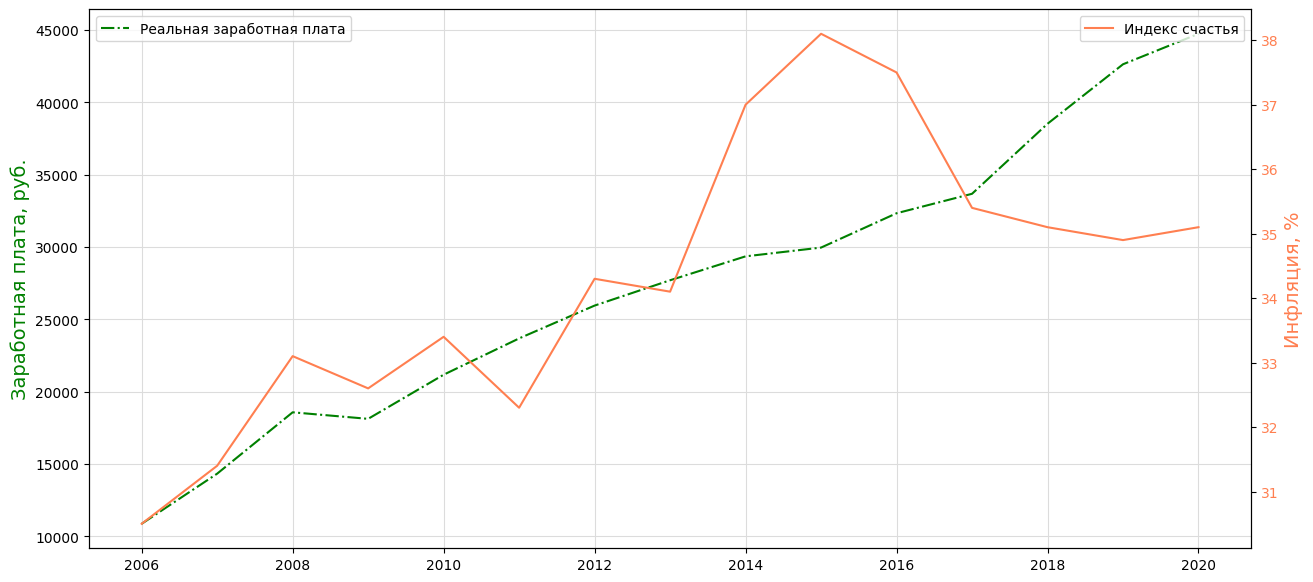

In [35]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'green'
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Заработная плата, руб.', color=color, fontsize=14)
ax1.plot(years, y, '-.', color=color, label='Реальная заработная плата')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'coral'
ax2.set_ylabel('Инфляция, %', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(years, z, label='Индекс счастья', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(years[::2])
# plt.ylabel('Руб.', fontsize=14)
ax1.legend(loc='best')
ax2.legend(loc='best')

# plt.title(f'Вид экономической деятельности: {industry}')
# ax1.grid(which='major', axis='x', color='gainsboro', linestyle='-')
ax1.grid(which='major', axis='both', color='gainsboro', linestyle='-')
plt.show();

In [38]:
y = df_corr.iloc[-1].values[1:].astype('float')
for i in range(3):
  x = df_corr.iloc[i].values[1:].astype('int')
  print(np.corrcoef(x, y))


[[1.        0.6870013]
 [0.6870013 1.       ]]
[[1.         0.72714296]
 [0.72714296 1.        ]]
[[1.         0.72721621]
 [0.72721621 1.        ]]
